# Circular Cities and Spatial Data Science (10 min)

In this hands-on workshop, we’ll explore how spatial data can help us design more **circular cities** — linking where materials come from (demolition) and where they go (construction).

You’ll learn how to:
1. Load and visualize spatial data (roads, hubs, materials)
2. Calculate travel distances along a road network
3. Measure accessibility for one hub
4. Compare all hubs and map circular hotspots

**Why it matters:**  
By connecting material supply and demand across the city, we can reduce waste, transport emissions, and resource use — making cities more circular and sustainable.

Let’s start by loading our data.


# Step 1: Load our spatial data (15 min)

In this part, we’ll load three simple map layers (called *shapefiles*) that represent:
- **Roads** – the network connecting different parts of the city  
- **Potential hubs** – possible collection or recycling centers  
- **Materials** – locations where materials are supplied or needed  

We’ll use a Python library called **GeoPandas**, which helps us work with map data the same way we work with tables.

In [118]:
# Import libraries we need
# pandas = for handling data tables
# geopandas = for handling map (spatial) data
import pandas as pd
import geopandas as gpd

# Load each shapefile (these are like spreadsheets with geometry)
roads = gpd.read_file("data/roads.shp")
hubs = gpd.read_file("data/hubs.shp")
materials = gpd.read_file("data/materials.shp")

# Check that our data loaded correctly
print("Roads:", len(roads), "rows")
print("Hubs:", len(hubs), "rows")
print("Materials:", len(materials), "rows")

Roads: 534 rows
Hubs: 139 rows
Materials: 7411 rows


Each table has a **geometry** column — this tells Python where each feature (like a road or hub) is located on the map.

In [120]:
# Let’s quickly preview what our data looks like
display(roads.head(2))
display(hubs.head(2))
display(materials.head(2))

,FID,geometry
0,0,"LINESTRING (135854.905 496582.873, 134676.896 ..."
1,1,"LINESTRING (131073.398 496613.301, 130760.604 ..."


,RIN_NUMMER,MAX_MILIEU,pPerSqm,hubName,geometry
0,1224,3,368.842673,0,POINT (127087.684 476511.77)
1,26201302,3,369.137643,1,POINT (128235.111 473682.661)


,kgDemand,kgSupply,geometry
0,94892.742141,0.0,POINT (98100 473500)
1,94892.742141,0.0,POINT (98100 473600)


Now, let’s take a look at everything on the map!

Text(0.5, 1.0, 'Overview of Roads, Hubs, and Materials')

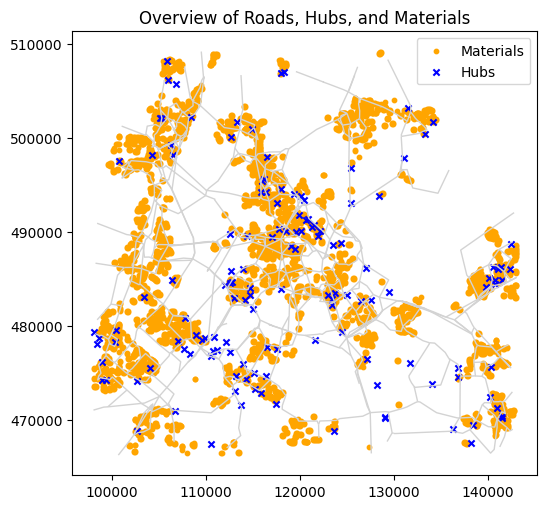

In [123]:
# Plot all three layers together
ax = roads.plot(color="lightgrey", linewidth=1, figsize=(6, 6))
materials.plot(ax=ax, color="orange", markersize=10, label="Materials")
hubs.plot(ax=ax, color="blue", markersize=20, marker="x", label="Hubs")

# Add legend and title
ax.legend()
ax.set_title("Overview of Roads, Hubs, and Materials")

✅ **Checkpoint:** You’ve just loaded and visualized your first spatial dataset!

**Think about:**  
- What patterns can you already see?  
- Where are most of the materials located — close to roads or far away?

# Step 2: Calculate distances between materials and hubs (15 min)

Now that we’ve seen our spatial data, we’ll calculate how far each **material location** is from each **hub**.

We’ll do this using a library called **Spaghetti**, which helps us work with *networks* — in this case, the **road network**.  
Think of it as measuring how far things are if you travel *along the roads*, not in a straight line.

We’ll create what’s called a **distance matrix** — a table showing the travel distance from every material location to every hub.


In [ ]:
# Import libraries for spatial analysis
import spaghetti   # For road network analysis
import numpy as np  # For handling numbers

In [ ]:
# Step 1: Create a road network
road_network = spaghetti.Network(in_data=roads)
print("Road network created with", len(roads), "road segments")

# Step 2: Snap material and hub points to the road network
road_network.snapobservations(materials, "materials", attribute=True)
road_network.snapobservations(hubs, "hubs", attribute=True)
print("Snapped materials and hubs to the road network")

# Step 3: Compute distances from each material to each hub
distance_matrix = road_network.allneighbordistances(
    sourcepattern=road_network.pointpatterns["materials"],
    destpattern=road_network.pointpatterns["hubs"],
)
print("Distance matrix calculated!")


/Users/tsuitpy/miniconda3/envs/geo_env/lib/python3.10/site-packages/spaghetti/network.py:3412: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  pts = [cg.shapes.Point((p.x, p.y)) for p in pts_objs]
/Users/tsuitpy/miniconda3/envs/geo_env/lib/python3.10/site-packages/spaghetti/util.py:572: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  return cg.Chain([cg.Point(_vcoords[v]) for v in _vs] if _vcoords else _vs)
/Users/tsuitpy/miniconda3/envs/geo_env/lib/python3.10/site-packages/libpysal/cg/shapes.py:1025: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  self._bounding_box = Rectangle(
/Users/tsuitpy/miniconda3/envs/geo_env/lib/python3.10/site-packages/spaghetti/network.py:3412: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.


✅ **Checkpoint:** You’ve just created a table that tells us how far each material location is from each hub along the road network.

In [125]:
# Turn the distance matrix into a readable table
distance_matrix_df = (
    pd.DataFrame(distance_matrix)
    .rename_axis(index="material_id", columns="hub_id")
)

# Show the first few rows
distance_matrix_df.head()

hub_id,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
material_id,,,,,,,,,,,,,,,,,,,,,
0,36218.171904,37827.610122,33393.683196,39907.561119,40053.224114,52433.005338,54905.503753,54962.798387,57141.905060,52135.603083,...,7850.469737,7315.728895,11188.931040,5444.918839,2178.726732,23979.533405,6375.472845,612.397276,10333.680423,51885.174692
1,36218.171906,37827.610125,33393.683199,39907.561122,40053.224117,52433.005341,54905.503755,54962.798389,57141.905063,52135.603086,...,7850.469737,7315.728895,11188.931043,5444.918839,2178.726732,23979.533408,6375.472845,612.397279,10333.680425,51885.174695
2,36280.485055,37889.923274,33455.996348,39969.874270,40115.537266,52495.318489,54967.816904,55025.111538,57204.218211,52197.916235,...,7788.156592,7253.415750,11251.244192,5382.605694,2116.413588,24041.846556,6313.159701,674.710428,10395.993574,51947.487843
3,36377.951538,37987.389757,33553.462831,40067.340754,40213.003749,52592.784973,55065.283387,55122.578022,57301.684695,52295.382718,...,7690.690109,7155.949267,11348.710675,5285.139211,2018.947105,24139.313040,6215.693217,772.176911,10493.460058,52044.954327
4,36381.945802,37991.384021,34137.506609,40651.384531,40797.047527,52596.779237,55069.277652,55126.572286,57305.678959,52299.376982,...,6426.185683,5891.444842,12613.215096,4020.634786,754.442679,24723.356817,4951.188792,2036.681332,11077.503835,52048.948591


Each row is a **material site**, and each column is a **hub**.  
The number in the table shows the travel distance (in meters) between them.

In [126]:
# Optional: Save to file so we can use it later
distance_matrix_df.to_csv("data/distance_matrix.csv", index=True)
print("Saved distance matrix to data/distance_matrix.csv")

Saved distance matrix to data/distance_matrix.csv


Now that we’ve calculated distances, we can start asking interesting questions —  
like **“Which hubs can reach the most material sources within 10 km?”**

Let’s explore that next!

# Step 3: Explore one hub (20 min)

Now that we know the distance between every **material site** and **hub**,  
let’s start small and look at **just one hub**.

We’ll answer three simple questions:
1. Which material sites are within 10 km of this hub?  
2. How much material (supply) can it collect nearby?  
3. How much material demand is in its surroundings?

This helps us understand how connected and useful each hub might be for circular material flows.

In [128]:
# Choose one hub (you can change this number to explore others)
hub_id = 15

# Define what "nearby" means — here, 10 kilometers
max_travel_distance = 10_000  # meters

print(f"Analyzing Hub {hub_id} within {max_travel_distance/1000} km...")

Analyzing Hub 15 within 10.0 km...


In [129]:
# Get distances from this hub to all material sites
selected_hub_distances = distance_matrix_df[hub_id]

# Keep only the materials within 10 km
accessible_material_ids = selected_hub_distances[selected_hub_distances <= max_travel_distance].index

# Select those materials from our main dataset
accessible_materials = materials.loc[materials.index.isin(accessible_material_ids)]

print(f"Hub {hub_id} can reach {len(accessible_materials)} material locations within {max_travel_distance/1000:.0f} km.")

Hub 15 can reach 1036 material locations within 10 km.


In [130]:
# Calculate total supply (demolition materials) and demand (construction needs)
total_supply = accessible_materials.kgSupply.sum() / 1_000_000  # convert to kilo-tons
total_demand = accessible_materials.kgDemand.sum() / 1_000_000

print(f"Total material supply: {total_supply:.1f} kilo-tons")
print(f"Total material demand: {total_demand:.1f} kilo-tons")

Total material supply: 80.0 kilo-tons
Total material demand: 404.8 kilo-tons


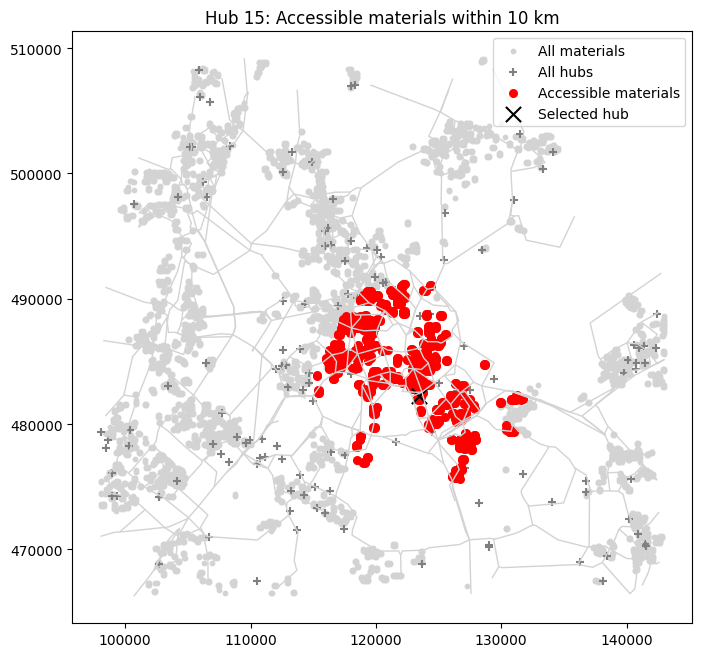

In [131]:
import matplotlib.pyplot as plt

# Plot the map to see which materials are accessible for this hub
ax = roads.plot(color="lightgrey", linewidth=1, figsize=(8, 8))
materials.plot(ax=ax, color="lightgrey", markersize=10, label="All materials")
hubs.plot(ax=ax, color="grey", marker="+", label="All hubs")

# Highlight the accessible materials and the selected hub
accessible_materials.plot(ax=ax, color="red", markersize=30, label="Accessible materials")
hubs.iloc[[hub_id]].plot(ax=ax, color="black", marker="x", markersize=120, label="Selected hub")

plt.legend()
plt.title(f"Hub {hub_id}: Accessible materials within {max_travel_distance/1000:.0f} km")
plt.show()

✅ **Checkpoint:**  
You’ve just measured how well one hub is connected to nearby material flows!

Here’s what the map shows:
- **Grey dots:** all material sites (supply and demand)  
- **Red dots:** materials this hub can reach within 10 km  
- **Black cross:** the hub you analyzed  

**Questions to think about:**
- Are most of the reachable materials near roads or clustered together?  
- Does the hub seem well-located for collecting materials efficiently?  
- What might happen if you increase the distance from 10 km to 20 km?


# Step 4: Analyze all hubs (20 min)

Now that we know how to measure accessibility for **one hub**,  
let’s repeat the same process for **every hub** in our dataset.

This will help us:
- Compare how well each hub can access nearby material sites  
- Identify which hubs have the most **material supply** or **demand** nearby

We’ll do three things:
1. Go through each hub one by one  
2. Count how many material sites it can reach within 10 km  
3. Add up the total supply and demand of those materials  

We’ll store all these results in a table for easy comparison.

In [132]:
# Define the same travel distance as before
max_travel_distance = 10_000  # 10 km

# Prepare an empty list to store results
results = []

# Go through each hub and calculate total reachable materials
for hub_id in distance_matrix_df.columns:
    selected_hub_distances = distance_matrix_df[hub_id]
    accessible_material_ids = selected_hub_distances[selected_hub_distances <= max_travel_distance].index
    accessible_materials = materials.loc[materials.index.isin(accessible_material_ids)]

    # Calculate total supply and demand (convert to kilo-tons)
    total_supply = accessible_materials.kgSupply.sum() / 1_000_000
    total_demand = accessible_materials.kgDemand.sum() / 1_000_000

    results.append({
        "hub_id": hub_id,
        "total_supply_kilotons": total_supply,
        "total_demand_kilotons": total_demand
    })

# Combine all results into a DataFrame
hub_summary = pd.DataFrame(results)

# Preview the results
hub_summary.head()

,hub_id,total_supply_kilotons,total_demand_kilotons
0,0,22.427595,135.119577
1,1,3.483606,66.467124
2,2,1.492943,16.745422
3,3,0.518091,13.719306
4,4,0.518091,13.719306


✅ **Checkpoint:**  
We now have a table showing, for each hub:
- How much material supply it can reach within 10 km  
- How much demand there is in the same area  

Let’s visualize this to see which hubs perform best.


In [133]:
import plotly.express as px

fig = px.scatter(
    hub_summary,
    x="total_supply_kilotons",
    y="total_demand_kilotons",
    hover_name="hub_id",
    labels={
        "total_supply_kilotons": "Total Supply (kilo-tons)",
        "total_demand_kilotons": "Total Demand (kilo-tons)"
    },
    title=f"Supply vs. Demand for All Hubs (within {max_travel_distance/1000:.0f} km)"
)

fig.update_layout(
    template="plotly_white",
    width=650,
    height=450
)

fig.show()


🧠 **Interpretation:**
- Each dot represents a hub.
- Hubs further **to the right** have more material *supply* nearby.
- Hubs higher **up** have more *demand* nearby.

**Think about:**
- Which hubs seem to have both high supply and high demand?
- Which ones might be too far from either materials or projects?


In [134]:
# Calculate medians to use as thresholds
supply_median = hub_summary["total_supply_kilotons"].median()
demand_median = hub_summary["total_demand_kilotons"].median()

def classify_hub(row):
    if row["total_supply_kilotons"] >= supply_median and row["total_demand_kilotons"] >= demand_median:
        return "High supply, high demand"
    elif row["total_supply_kilotons"] >= supply_median:
        return "High supply, low demand"
    elif row["total_demand_kilotons"] >= demand_median:
        return "Low supply, high demand"
    else:
        return "Low supply, low demand"

hub_summary["category"] = hub_summary.apply(classify_hub, axis=1)
hub_summary.head()


,hub_id,total_supply_kilotons,total_demand_kilotons,category
0,0,22.427595,135.119577,"Low supply, high demand"
1,1,3.483606,66.467124,"Low supply, low demand"
2,2,1.492943,16.745422,"Low supply, low demand"
3,3,0.518091,13.719306,"Low supply, low demand"
4,4,0.518091,13.719306,"Low supply, low demand"


In [135]:
fig = px.scatter(
    hub_summary,
    x="total_supply_kilotons",
    y="total_demand_kilotons",
    color="category",
    hover_name="hub_id",
    labels={
        "total_supply_kilotons": "Total Supply (kilo-tons)",
        "total_demand_kilotons": "Total Demand (kilo-tons)",
        "category": "Hub Type"
    },
    title=f"Hub Categories by Supply and Demand (within {max_travel_distance/1000:.0f} km)",
    color_discrete_map={
        "High supply, high demand": "#2ca02c",
        "High supply, low demand": "#1f77b4",
        "Low supply, high demand": "#ff7f0e",
        "Low supply, low demand": "#d62728"
    }
)

fig.update_layout(
    template="plotly_white",
    width=650,
    height=450
)

fig.show()


✅ **Checkpoint:**  
We’ve now compared all hubs and grouped them into categories based on their surroundings.

**High supply, high demand** hubs are potentially the best circular hotspots —  
they’re surrounded by both demolition (supply) and construction (demand).

**Discussion:**
- How might these results change with a larger or smaller distance threshold?  
- What could make a “low supply, high demand” hub more efficient (e.g., new road links or logistics centers)?


# Step 5: Visualize all hubs on the map (10 min)

We’ve categorized each hub based on how much **material supply** and **demand** is nearby.  
Now, let’s map these categories to see where the most promising hubs are located.

This helps us visually identify **circular hotspots** —  
places where demolition and construction activities overlap the most.

In [136]:
# Combine the hub category information with the hub locations
hubs_with_cat = hubs.copy()
hubs_with_cat = hubs_with_cat.merge(
    hub_summary[["hub_id", "category"]],
    left_index=True, right_on="hub_id"
)

# Check that the merge worked
hubs_with_cat.head()


,RIN_NUMMER,MAX_MILIEU,pPerSqm,hubName,geometry,hub_id,category
0,1224,3,368.842673,0,POINT (127087.684 476511.77),0,"Low supply, high demand"
1,26201302,3,369.137643,1,POINT (128235.111 473682.661),1,"Low supply, low demand"
2,2909,3,267.265242,2,POINT (123654.056 468805.812),2,"Low supply, low demand"
3,4433,3,326.087208,3,POINT (129052.516 470346.762),3,"Low supply, low demand"
4,262017001,3,327.404716,4,POINT (128994.435 470188.445),4,"Low supply, low demand"


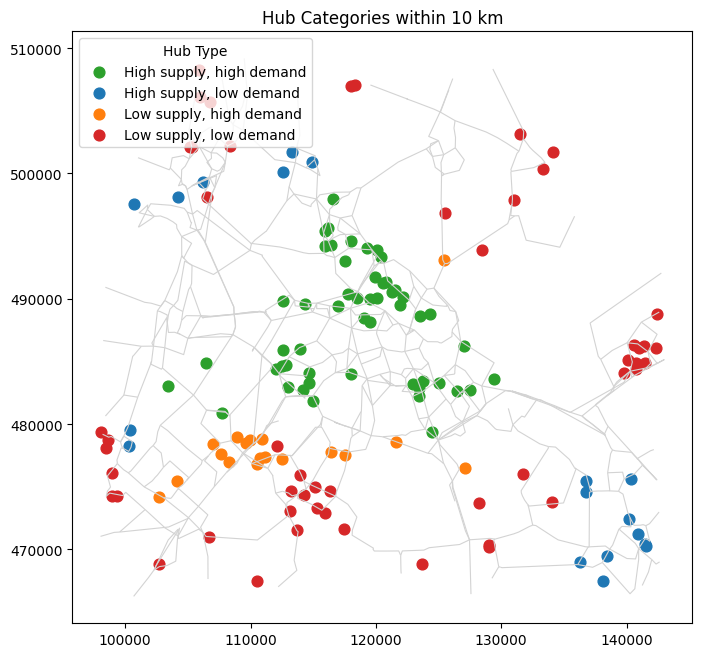

In [137]:
# Define consistent colors for the four categories
category_colors = {
    "High supply, high demand": "#2ca02c",   # green
    "High supply, low demand": "#1f77b4",    # blue
    "Low supply, high demand": "#ff7f0e",    # orange
    "Low supply, low demand": "#d62728"      # red
}

# Plot the base road map
ax = roads.plot(color="lightgrey", linewidth=0.8, figsize=(8, 8))

# Plot hubs by category
for cat, color in category_colors.items():
    subset = hubs_with_cat[hubs_with_cat["category"] == cat]
    subset.plot(ax=ax, color=color, markersize=60, label=cat)

plt.legend(title="Hub Type", loc="upper left")
plt.title(f"Hub Categories within {max_travel_distance/1000:.0f} km")
plt.show()


✅ **Checkpoint:**  
This map shows how different hubs perform based on nearby supply and demand.

**Colors:**  
- 🟢 High supply, high demand — most promising hubs for circular material flows  
- 🔵 High supply, low demand — good for exporting recycled materials  
- 🟠 Low supply, high demand — good for importing materials  
- 🔴 Low supply, low demand — less active or remote areas

**Questions to think about:**  
- Do the “green” hubs cluster in certain parts of the city?  
- Are “blue” hubs close to industrial or demolition-heavy zones?  
- How might planners use this information to reduce transport emissions?


# Step 6: Wrap-up and reflection

🎉 **Congratulations!**  
You’ve just completed a spatial data analysis workflow for circular cities.

In this workshop, you’ve learned how to:
1. Load and visualize spatial data (roads, hubs, materials)  
2. Calculate travel distances using a road network  
3. Measure accessibility for one hub  
4. Compare all hubs and categorize them  
5. Map the results to find circular hotspots

💡 **Key takeaway:**  
Spatial data science helps us connect abstract ideas — like *material reuse* — to *real locations* in the city.  
It shows where opportunities for circularity are strongest and where infrastructure could be improved.


### 🌍 Challenge for you

- Try changing the distance threshold (e.g., 5 km or 20 km).  
  How does that change which hubs are classified as “high supply, high demand”?  
- What if we visualized only **construction demand** or only **demolition supply**?  
- How might this approach scale up to the **regional** or **national** level?

These questions show how data-driven thinking can guide circular urban planning.
